***Курсовая работа: Библиотеки Python для Data Science***

Подключение библиотек и скриптов

In [3]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

*Описание датасета*

Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

In [8]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [9]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


Видим что три признака имеют строковый тип данных

In [12]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [13]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

***1. EDA***

- построим графики
- Устраним выбросы
- рассмотрим типы данных

<Axes: xlabel='Price', ylabel='Density'>

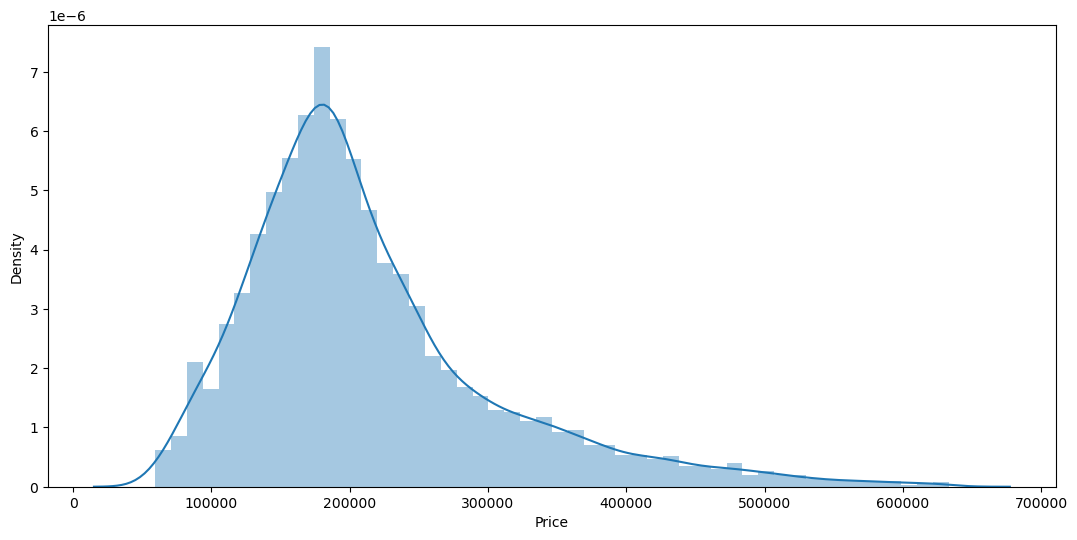

In [15]:
plt.figure(figsize = (13, 6))
sns.distplot(train_df['Price'])

На графике видим почти нормальное распределение со смещением в сторону бОльших цен, за выбросы не считаем

<Axes: xlabel='Rooms', ylabel='Square'>

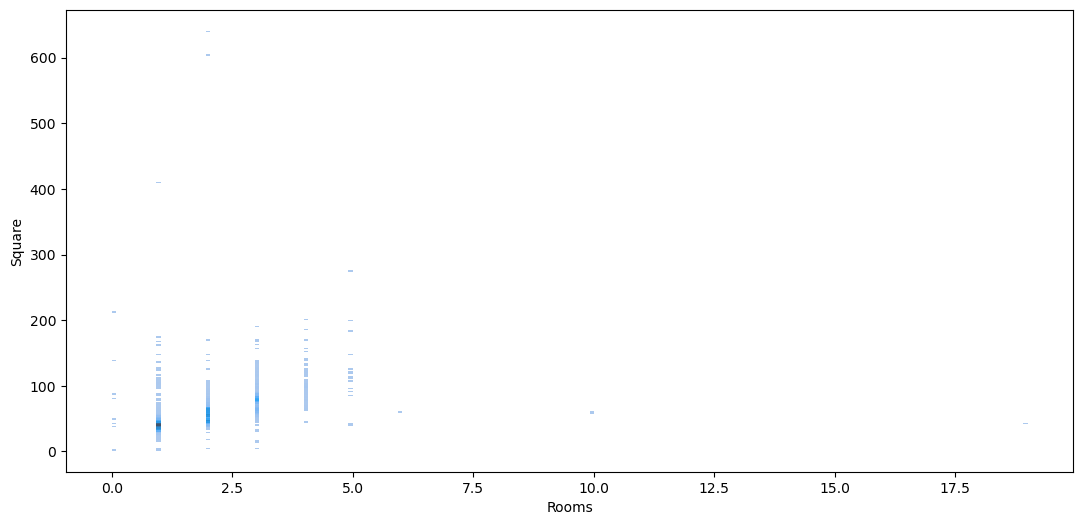

In [17]:
plt.figure(figsize = (13, 6))
sns.histplot(data = train_df, x = 'Rooms', y = 'Square')


По графику распределения квартир по кол-ву комнат и соответствующей площади видно как выбиваются выбросы из общей массы и как растет площадь с увеличением кол-ва комнат

In [19]:
train_df.describe()


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [20]:
train_df.select_dtypes(include='object').columns.tolist()


['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

Исследуюм каждый признак:

In [22]:
train_df['DistrictId'].value_counts()


DistrictId
27     851
1      652
23     565
6      511
9      294
      ... 
207      1
117      1
174      1
205      1
209      1
Name: count, Length: 205, dtype: int64

In [23]:
train_df['Ecology_2'].value_counts()


Ecology_2
B    9903
A      97
Name: count, dtype: int64

In [24]:
train_df['Ecology_3'].value_counts()


Ecology_3
B    9725
A     275
Name: count, dtype: int64

In [25]:
train_df['Shops_2'].value_counts()


Shops_2
B    9175
A     825
Name: count, dtype: int64

***2. Обработка выбросов***

*Rooms*

In [28]:
train_df['Rooms'].value_counts()


Rooms
2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: count, dtype: int64

Видим неадекватные значения 10 и 19 комнат, это явно выбросы, заменим на 1 и медиану

In [30]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,NaN,0,11,B,184966.930730,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,0


In [31]:
condition = train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6)]
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms'] = train_df['Rooms'].median()
train_df['Rooms'].value_counts()

Rooms
2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: count, dtype: int64

*Kitchen*

In [33]:
train_df['KitchenSquare'].value_counts()


KitchenSquare
1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
41.0         2
51.0         2
30.0         2
112.0        2
37.0         2
43.0         2
25.0         2
58.0         2
84.0         1
75.0         1
21.0         1
54.0         1
62.0         1
40.0         1
29.0         1
1970.0       1
27.0         1
39.0         1
35.0         1
23.0         1
73.0         1
31.0         1
60.0         1
63.0         1
42.0         1
36.0         1
96.0         1
26.0         1
53.0         1
78.0         1
66.0         1
2014.0       1
48.0         1
72.0         1
123.0        1
Name: count, dtype: int64

In [34]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)


(13.0, 0.0)

Судя по квантилям, понимаем что значения сильно больше 13 - это выбросы, заменим на медиану, а если меньше 3, то на 3

In [36]:
condition = (train_df['KitchenSquare'].isna()) | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [37]:
train_df['KitchenSquare'].value_counts()


KitchenSquare
3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: count, dtype: int64

*HouseFloor, Floor*



In [39]:
train_df['HouseFloor'].sort_values().unique()


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [40]:
train_df['Floor'].sort_values().unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [41]:
(train_df['Floor'] > train_df['HouseFloor']).sum()


1825

In [42]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [43]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [44]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Index([   7,   14,   16,   21,   26,   35,   39,   44,   51,   67,
       ...
       9959, 9962, 9971, 9973, 9975, 9984, 9985, 9989, 9991, 9995],
      dtype='int64', length=1610)

In [45]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [46]:
(train_df['Floor'] > train_df['HouseFloor']).sum()


0

*HouseYear*

In [48]:
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
5701        2020
2493        2020
1499        2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

в отсортированной выборке видим выбросы, от которых избавимся с помощью точечной замены значений

In [50]:
train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2011
train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 2020


In [51]:
train_df['HouseYear'].sort_values(ascending=False)

707     2020
790     2020
1499    2020
8253    2020
9674    2020
        ... 
7611    1916
910     1914
2656    1912
5111    1912
9317    1910
Name: HouseYear, Length: 10000, dtype: int64

*Square*

<Axes: xlabel='Square', ylabel='Price'>

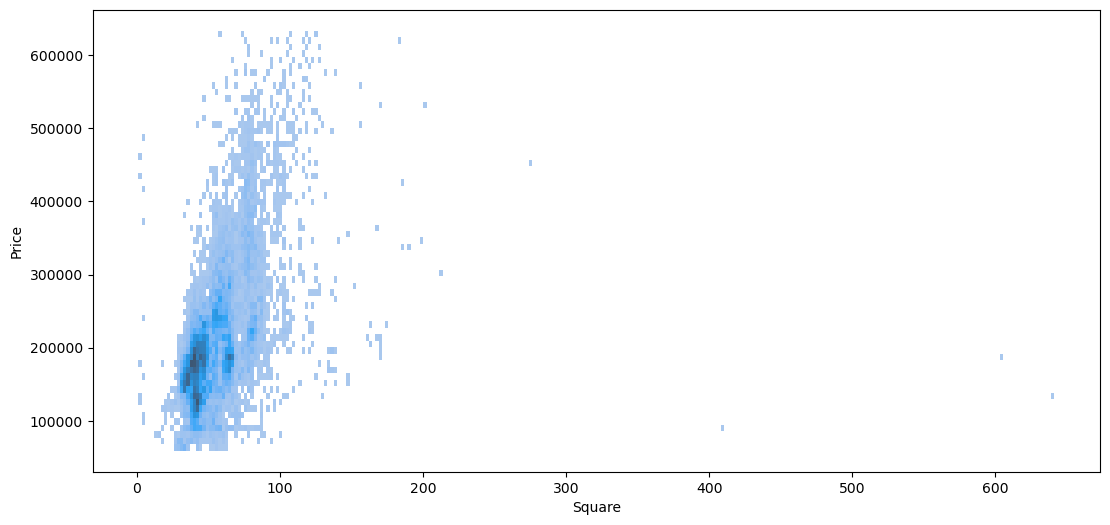

In [53]:
plt.figure(figsize = (13, 6))
sns.histplot(data = train_df, x = 'Square', y = 'Price')

На графике очевидно выбиваются значения больше 250 по площади, их всего 4, при этом цена у них в нижнем диапазоне, а значит это скорее всего неверные данные,  поэтому приведем их к медиане 

In [55]:
train_df.loc[train_df['Square'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier
1982,5548,86,5.0,275.645284,233.949309,6.0,12,37.0,2011,0.161976,...,31,7010,5,4508.0,3,7,B,455264.882666,0,0
4262,28,9,2.0,604.705972,NaN,3.0,17,18.0,1977,0.161532,...,25,5648,1,30.0,2,4,B,187717.242538,0,0
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,...,26,3889,6,705.0,3,6,B,90470.430830,0,0
6977,11602,30,2.0,641.065193,638.163193,10.0,14,19.0,2019,0.000078,...,22,6398,141,1046.0,3,23,B,133529.681562,0,1


In [56]:
train_df.loc[train_df['Square'] > 250, 'Square'] = train_df['Square'].median()

<Axes: xlabel='Square', ylabel='Price'>

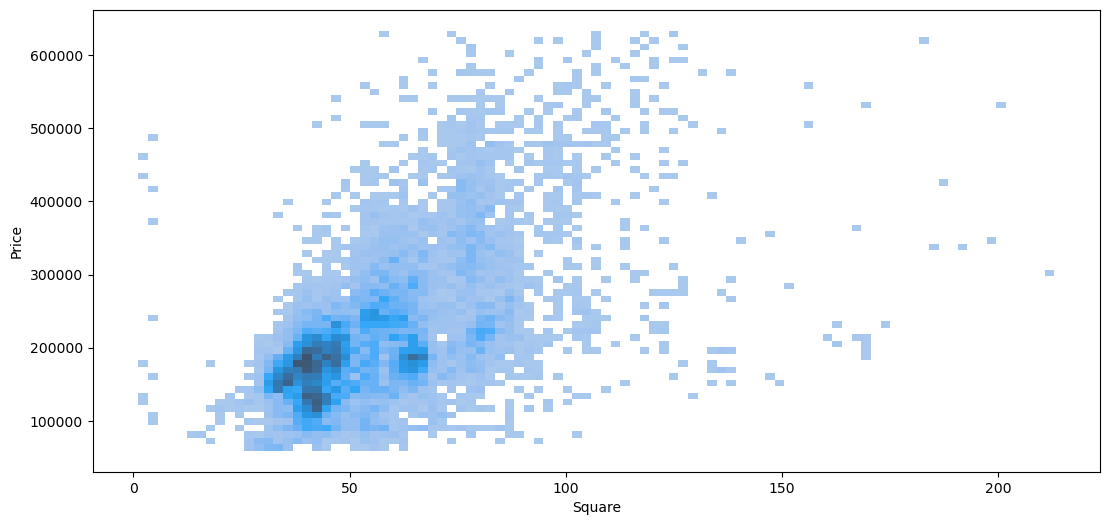

In [57]:
plt.figure(figsize = (13, 6))
sns.histplot(data = train_df, x = 'Square', y = 'Price')

Теперь без выбросов видно как площадь коррелирует с ценой

**Обработаем пропуски**

In [60]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

Всего в двух признаках видим пустые значения, в Healthcare_1 их половина, поэтому откажемся от него, удалив весь столбец. В другом же признаке высчитаем значение из данных общей площади и площади кухни

In [62]:
train_df.drop('Healthcare_1', axis=1, inplace=True)


In [63]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1

In [64]:
condition = (train_df['LifeSquare'].isna()) & (~train_df['Square'].isna()) & (~train_df['KitchenSquare'].isna())
        
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] - train_df.loc[condition, 'KitchenSquare'] - 3

In [65]:
train_df.isna().sum()


Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Rooms_outlier         0
HouseFloor_outlier    0
LifeSquare_nan        0
dtype: int64

Теперь датасет без пустых значений

Составим пайплайн из уже произведенных дейчствий для обработки любого датасета с такими признаками

In [68]:
class DataPreprocessing:

    def __init__(self):
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = X['Rooms'].median()
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = X['KitchenSquare'].median()

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = X['HouseFloor'].median()
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2011
        train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 2020
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3

        X.loc[train_df['Square'] > 250, 'Square'] = X['Square'].median()
        
        
        X.fillna(X.median, inplace=True)
        
        return X

Теперь заменим строковые значения признаков на числовые

In [70]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

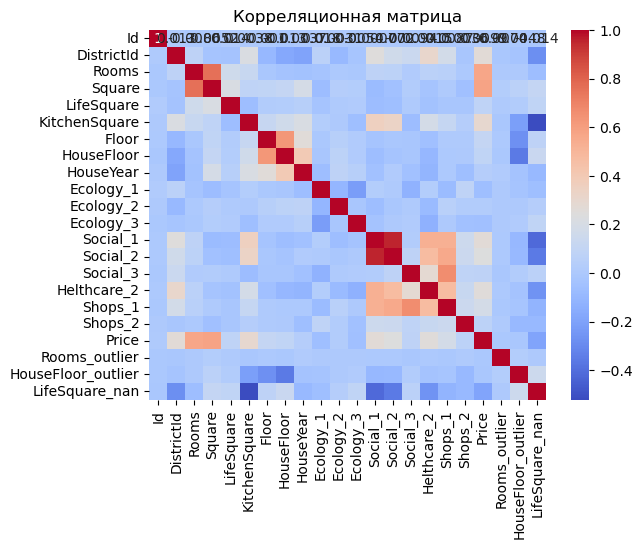

In [72]:
correlation_matrix = train_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Судя по матрице корреляции видно, что с нашей целевой переменной Price больше всего коррелирует количество комнат и общая площадь

Запишем пайплайн для генерации новых фич

In [75]:
class FeatureGenetator():
    
    def __init__(self):
        self.binary_to_numbers = None

    def fit(self, X, y=None):
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
    def transform(self, X):
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)        
        return X

**Разбиение на train и test**

In [77]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(['Price'], axis = 1)
y = train_df['Price']

In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

*Обработаем признаки датасета с помощью пайплайна*

In [80]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 22), (3300, 22), (5000, 22))

In [81]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 22), (3300, 22), (5000, 22))

In [82]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

**Построим модель случайного леса**

In [84]:
rf_model = RandomForestRegressor(random_state=21, criterion='friedman_mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', random_state=21)

**Оценка модели**

Train R2:	0.962
Test R2:	0.722


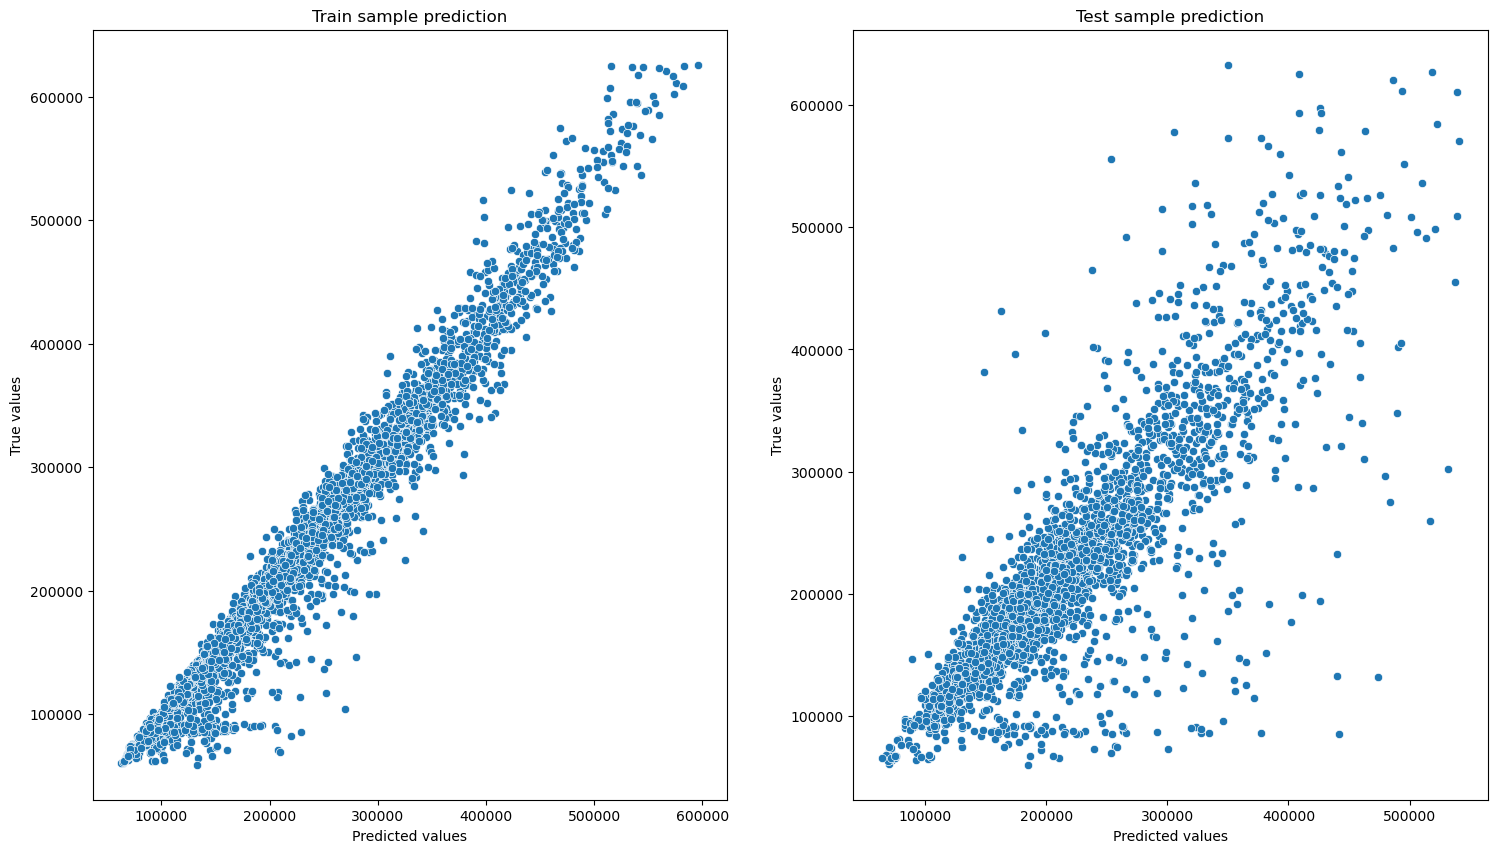

In [86]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**Прогнозирование на тестовом датасете без сравнения с истинными значениями**

In [88]:
test_df.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,11,2748,1,0,0,1,0,0,0,0
1,15856,74,2.0,69.263183,63.263183,3.0,1,1.0,1977,0.075779,...,6,1437,3,0,2,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,30,7538,87,5,5,1,0,0,0,0
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,23,4583,3,3,3,1,0,0,0,0
4,14275,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,...,2,629,1,0,0,0,0,0,0,0


In [89]:
predictions = rf_model.predict(test_df)
predictions

array([162627.27160032, 193823.9374264 , 220878.76333513, ...,
       338100.26913344, 206737.61748496, 154640.02139021])

In [90]:
submit = pd.DataFrame(test_df['Id'])
submit['Price'] = predictions
submit

,Id,Price
0,725,162627.271600
1,15856,193823.937426
2,5480,220878.763335
3,15664,361462.796294
4,14275,142291.603472
...,...,...
4995,8180,242793.951989
4996,4695,130828.182224
4997,5783,338100.269133
4998,4780,206737.617485


**Выводы**

Точность предсказания на валидационном датасете получилась 0,72. Это больше чем в показанном примере(0,7), достигнуть ее получилось по нескольким причинам - в EDA я дополнительно очистил выбросы по признаку 'Square',  так же не добавлял новые фичи  'DistrictSize',
 'IsDistrictLarge' 
 'MedPriceByDistrict,
 'year_ca',
 'floor_ct',
 'MedPriceByFloo.rYear